In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
#leitura
try:
    df = pd.read_excel('resultados/retornos.xlsx')
except:
    df = pd.read_excel('retornos_ponto.xlsx')

# Verificacao
df.head()

,timestamp,Ativo1,Ativo2,ativo1_mean,ativo2_mean,ativo1_std,ativo2_std,spread,rolling_mean,rolling_std,zscore,sinal,capital,retorno_trade,ativo1_desvio_preco,ativo1_std_preco,ativo2_desvio_preco,ativo2_std_preco
0,2025-05-30,103985.48,676.60,108000.414545,670.779091,2100.692101,13.563687,103308.88,107329.635455,2104.019330,-1.910988,compra_1_vende_2,10000.0,NaN,-4014.934545,-1.911244,5.820909,0.429154
1,2025-05-31,104591.88,654.12,107795.131818,671.130000,2322.932482,13.018732,103937.76,107124.001818,2324.477771,-1.370734,compra_1_vende_2,10000.0,NaN,-3203.251818,-1.378969,-17.010000,-1.306579
2,2025-06-01,105642.93,657.61,107431.399091,671.782727,2317.725885,12.018684,104985.32,106759.616364,2316.249918,-0.766021,compra_1_vende_2,10000.0,NaN,-1788.469091,-0.771648,-14.172727,-1.179225
3,2025-06-02,105857.99,661.07,106900.651818,670.530000,1868.339304,12.379739,105196.92,106230.121818,1866.699996,-0.553491,compra_1_vende_2,10000.0,NaN,-1042.661818,-0.558069,-9.460000,-0.764152
4,2025-06-03,105376.89,666.75,106724.160000,668.850909,1916.029609,11.402013,104710.14,106055.309091,1914.614943,-0.702579,compra_1_vende_2,10000.0,NaN,-1347.270000,-0.703157,-2.100909,-0.184258


In [3]:
# Leitura do CSV
df = pd.read_excel("resultados/retornos.xlsx")

#Conversão para timestamp e criação de colunas auxiliares
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour

colunas = ['Ativo1', 'Ativo2', 'rolling_mean']
df[colunas] = df[colunas].apply(pd.to_numeric, errors='coerce')

'''Normalizando para o gráfico'''
#Não mais necessário

base_ativo1 = df['Ativo1'].iloc[0]
base_ativo2 = df['Ativo2'].iloc[0]
base_rolling = df['rolling_mean'].iloc[0]

#Coluna de variacao acumulada
df['ativo1_trend'] = (df['Ativo1'] / base_ativo1) - 1
df['ativo2_trend'] = (df['Ativo2'] / base_ativo2) - 1
df['rolling_trend'] = (df['rolling_mean'] / base_rolling) - 1

# Identificar quando muda o sinal
df['sinal_shift'] = df['sinal'].shift(1)
df['sinal_neutro'] = (df['sinal'] == 'neutro') & (df['sinal'] != df['sinal_shift'])
df['sinal_c1v2'] = (df['sinal'] == 'compra_1_vende_2') & (df['sinal'] != df['sinal_shift'])
df['sinal_c2v1'] = (df['sinal'] == 'compra_2_vende_1') & (df['sinal'] != df['sinal_shift'])


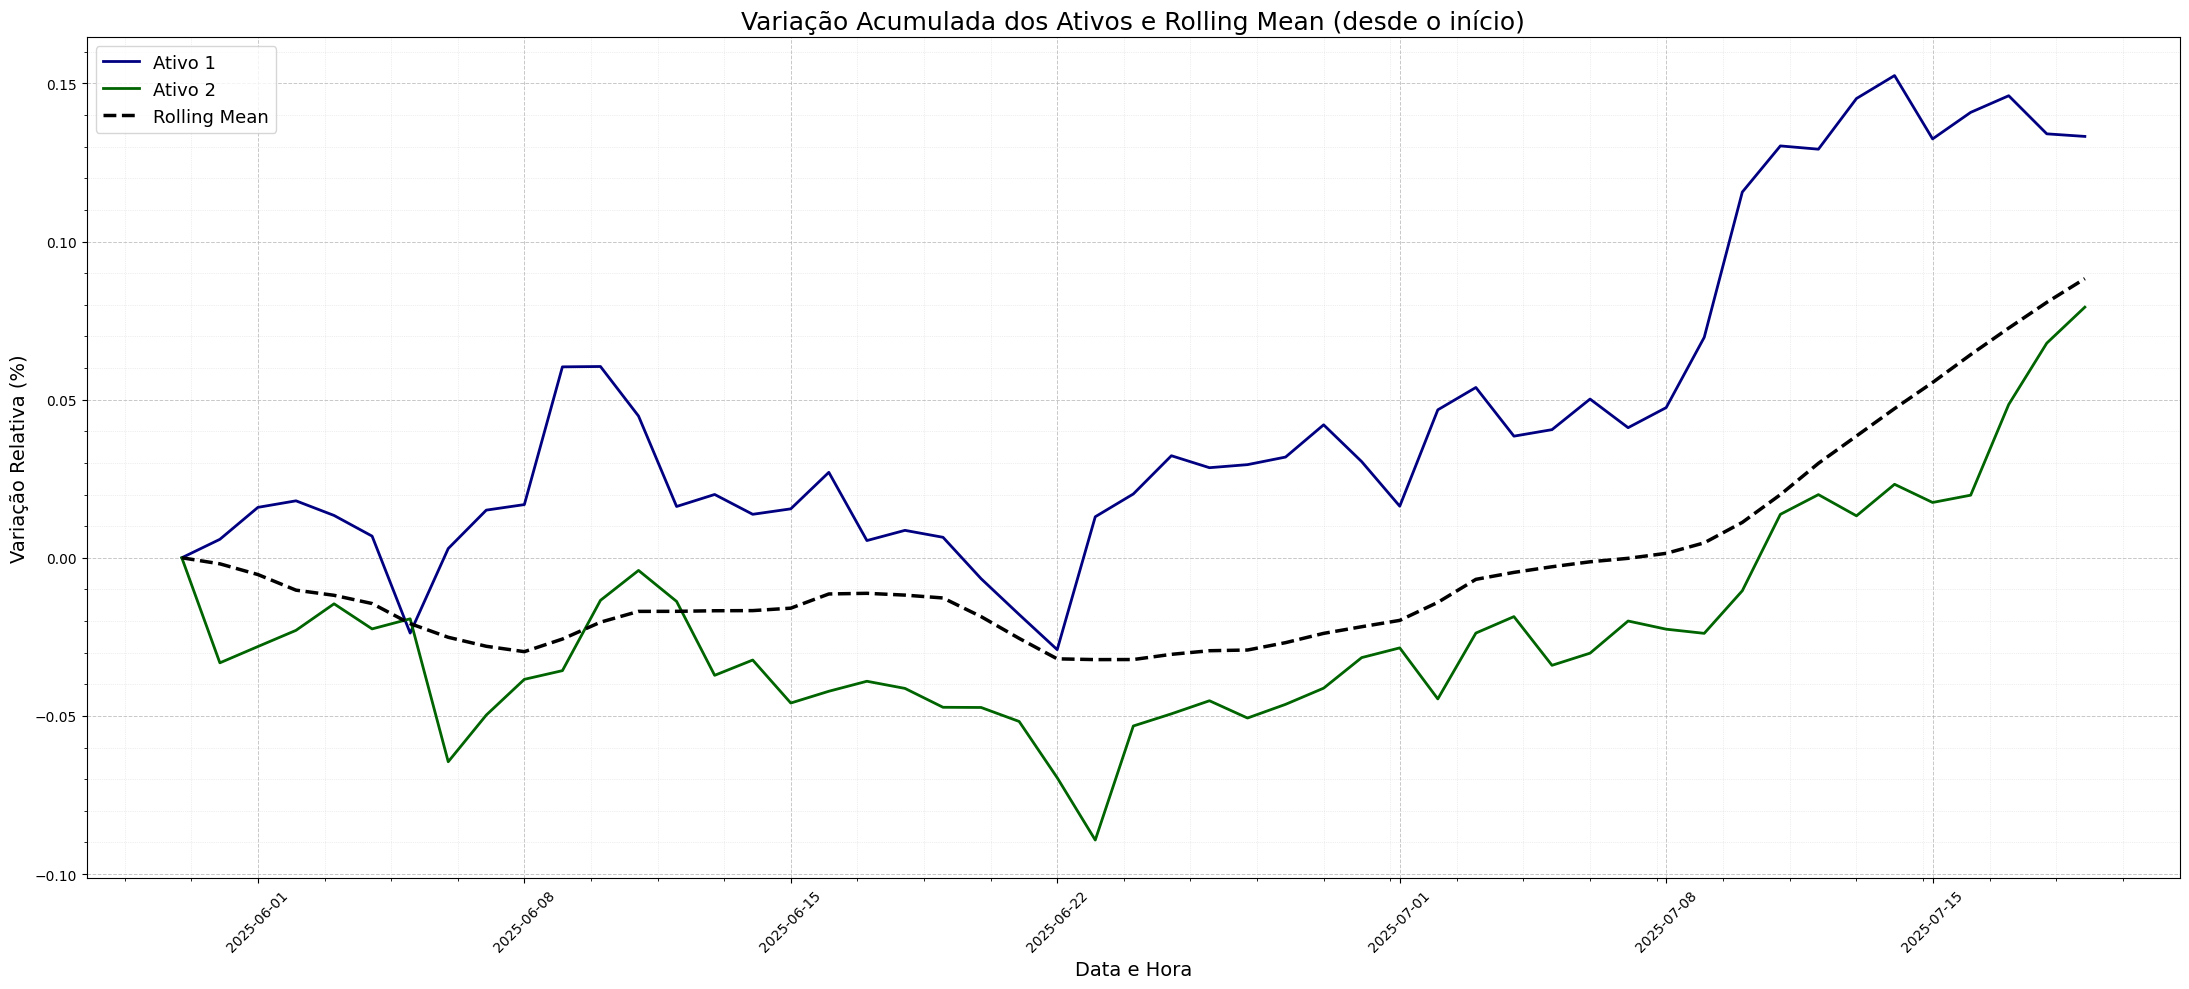

In [5]:
'''Criacao do grafico com todo o df'''
plt.figure(figsize=(22, 10))
plt.plot(df['timestamp'], df['ativo1_trend'], label='Ativo 1', color='navy', linewidth=2)
plt.plot(df['timestamp'], df['ativo2_trend'], label='Ativo 2', color='darkgreen', linewidth=2)
plt.plot(df['timestamp'], df['rolling_trend'], label='Rolling Mean', color='black', linestyle='--', linewidth=2.5)

plt.title('Variação Acumulada dos Ativos e Rolling Mean (desde o início)', fontsize=18)
plt.xlabel('Data e Hora', fontsize=14)
plt.ylabel('Variação Relativa (%)', fontsize=14)
plt.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.4)
plt.xticks(rotation=45)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()

In [4]:
'''Função para ter uma visualização mais próxima do gráfico'''

def plot_variacao_por_4horas_sinal(df, dia, hora):
    df_filtro = df[
        (df['date'] == dia) &
        (df['timestamp'] >= pd.Timestamp(dia) + pd.Timedelta(hours=hora)) &
        (df['timestamp'] < pd.Timestamp(dia) + pd.Timedelta(hours=hora + 12))
    ]

    if df_filtro.empty:
        print(f"Nenhum dado encontrado para {dia} entre {hora}h e {hora+4}h.")
        return

    plt.figure(figsize=(22, 10))
    plt.plot(df_filtro['timestamp'], df_filtro['ativo1_std_preco'], label='Ativo 1', linewidth=2, color='navy')
    plt.plot(df_filtro['timestamp'], df_filtro['ativo2_std_preco'], label='Ativo 2', linewidth=2, color='darkgreen')

    # Marcar trocas de sinal no Ativo 1
    plt.scatter(df_filtro[df_filtro['sinal_neutro']]['timestamp'], df_filtro[df_filtro['sinal_neutro']]['ativo1_std_preco'],
                marker='x', s=120, color='gray', label='Troca para Neutro', zorder=5)
    plt.scatter(df_filtro[df_filtro['sinal_c1v2']]['timestamp'], df_filtro[df_filtro['sinal_c1v2']]['ativo1_std_preco'],
                marker='x', s=120, color='red', label='Troca para Compra 1 / Vende 2', zorder=5)
    plt.scatter(df_filtro[df_filtro['sinal_c2v1']]['timestamp'], df_filtro[df_filtro['sinal_c2v1']]['ativo1_std_preco'],
                marker='x', s=120, color='orange', label='Troca para Compra 2 / Vende 1', zorder=5)

    plt.title(f'Variação dos Ativos em {dia} das {hora}h às {hora+12}h', fontsize=18)
    plt.xlabel('Hora', fontsize=14)
    plt.ylabel('Variação Relativa (%)', fontsize=14)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.minorticks_on()
    plt.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.4)
    plt.xticks(rotation=45)
    plt.legend(fontsize=13)
    plt.tight_layout()
    plt.show()

Nenhum dado encontrado para 2025-05-28 entre 4h e 8h.


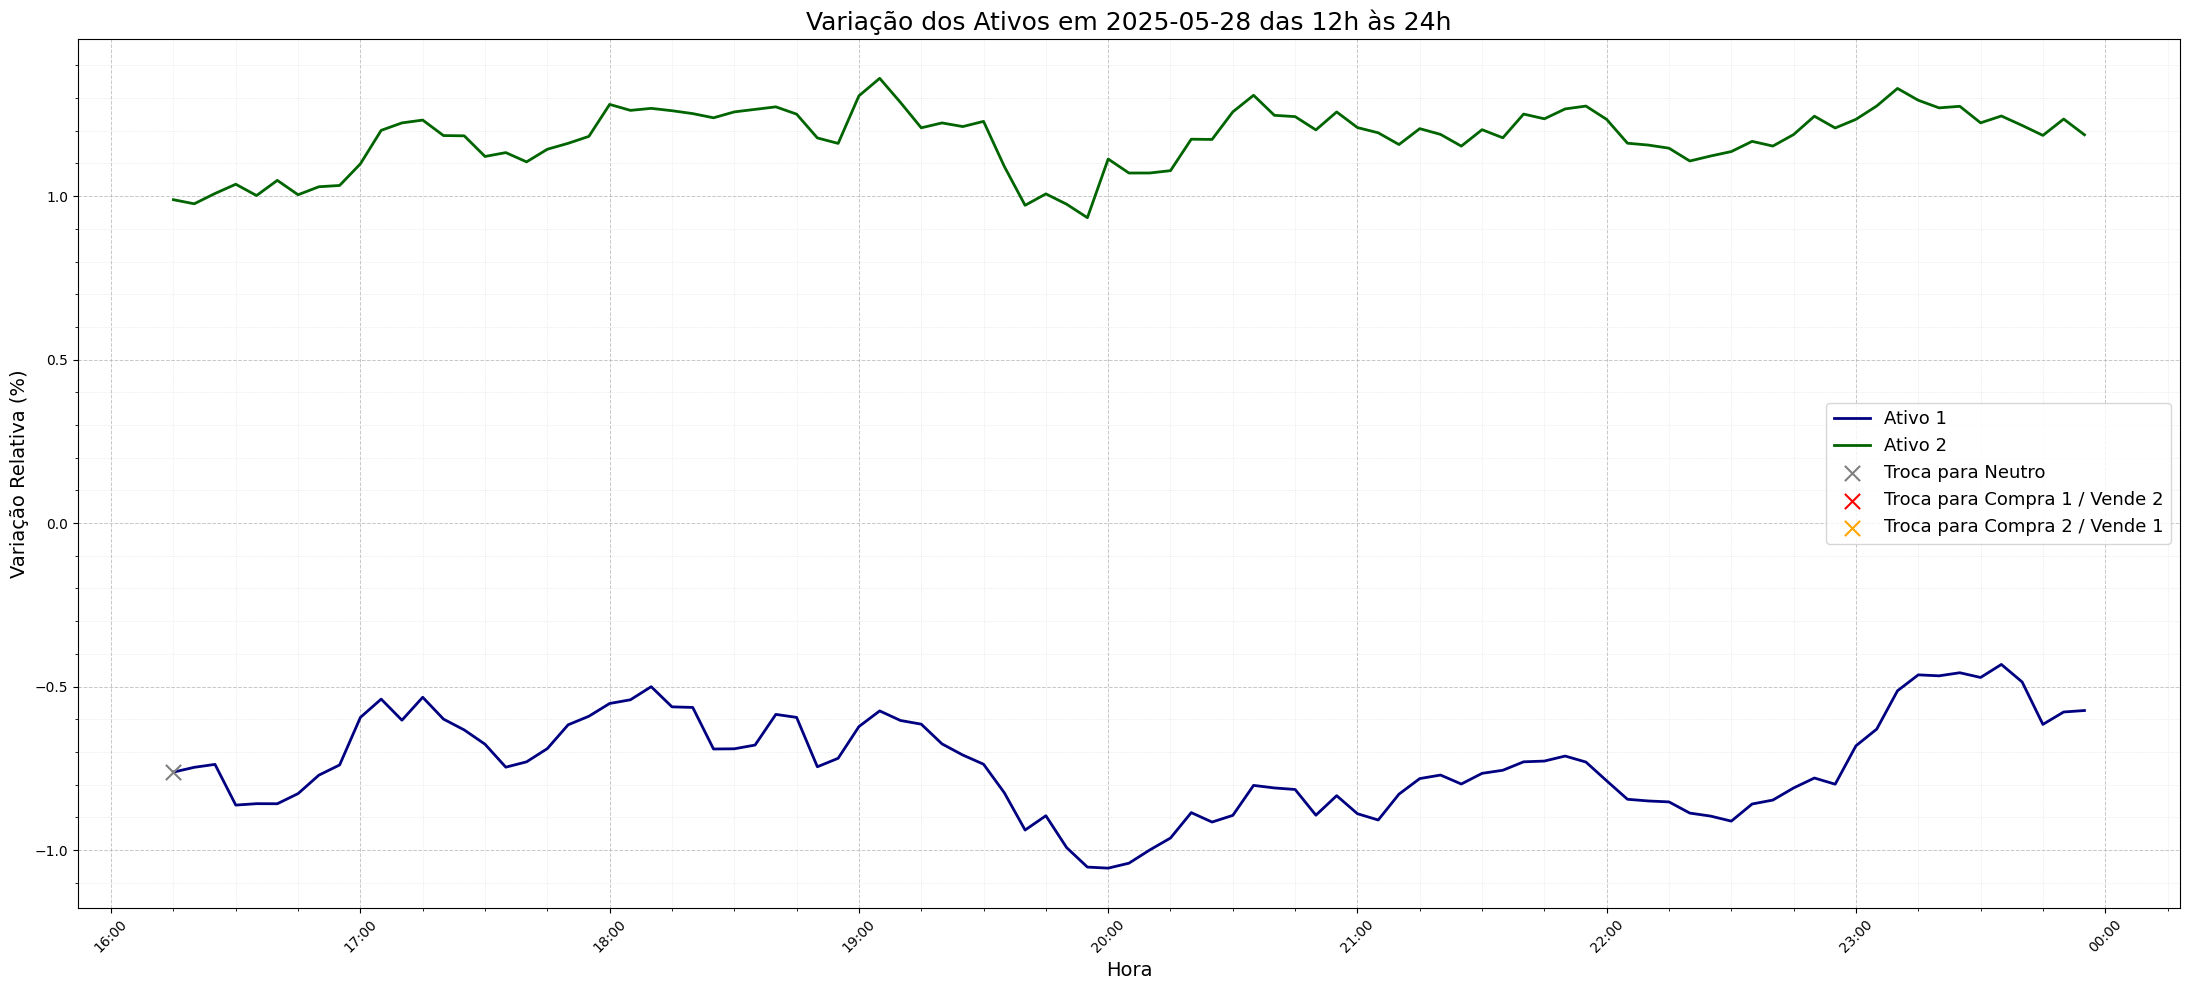

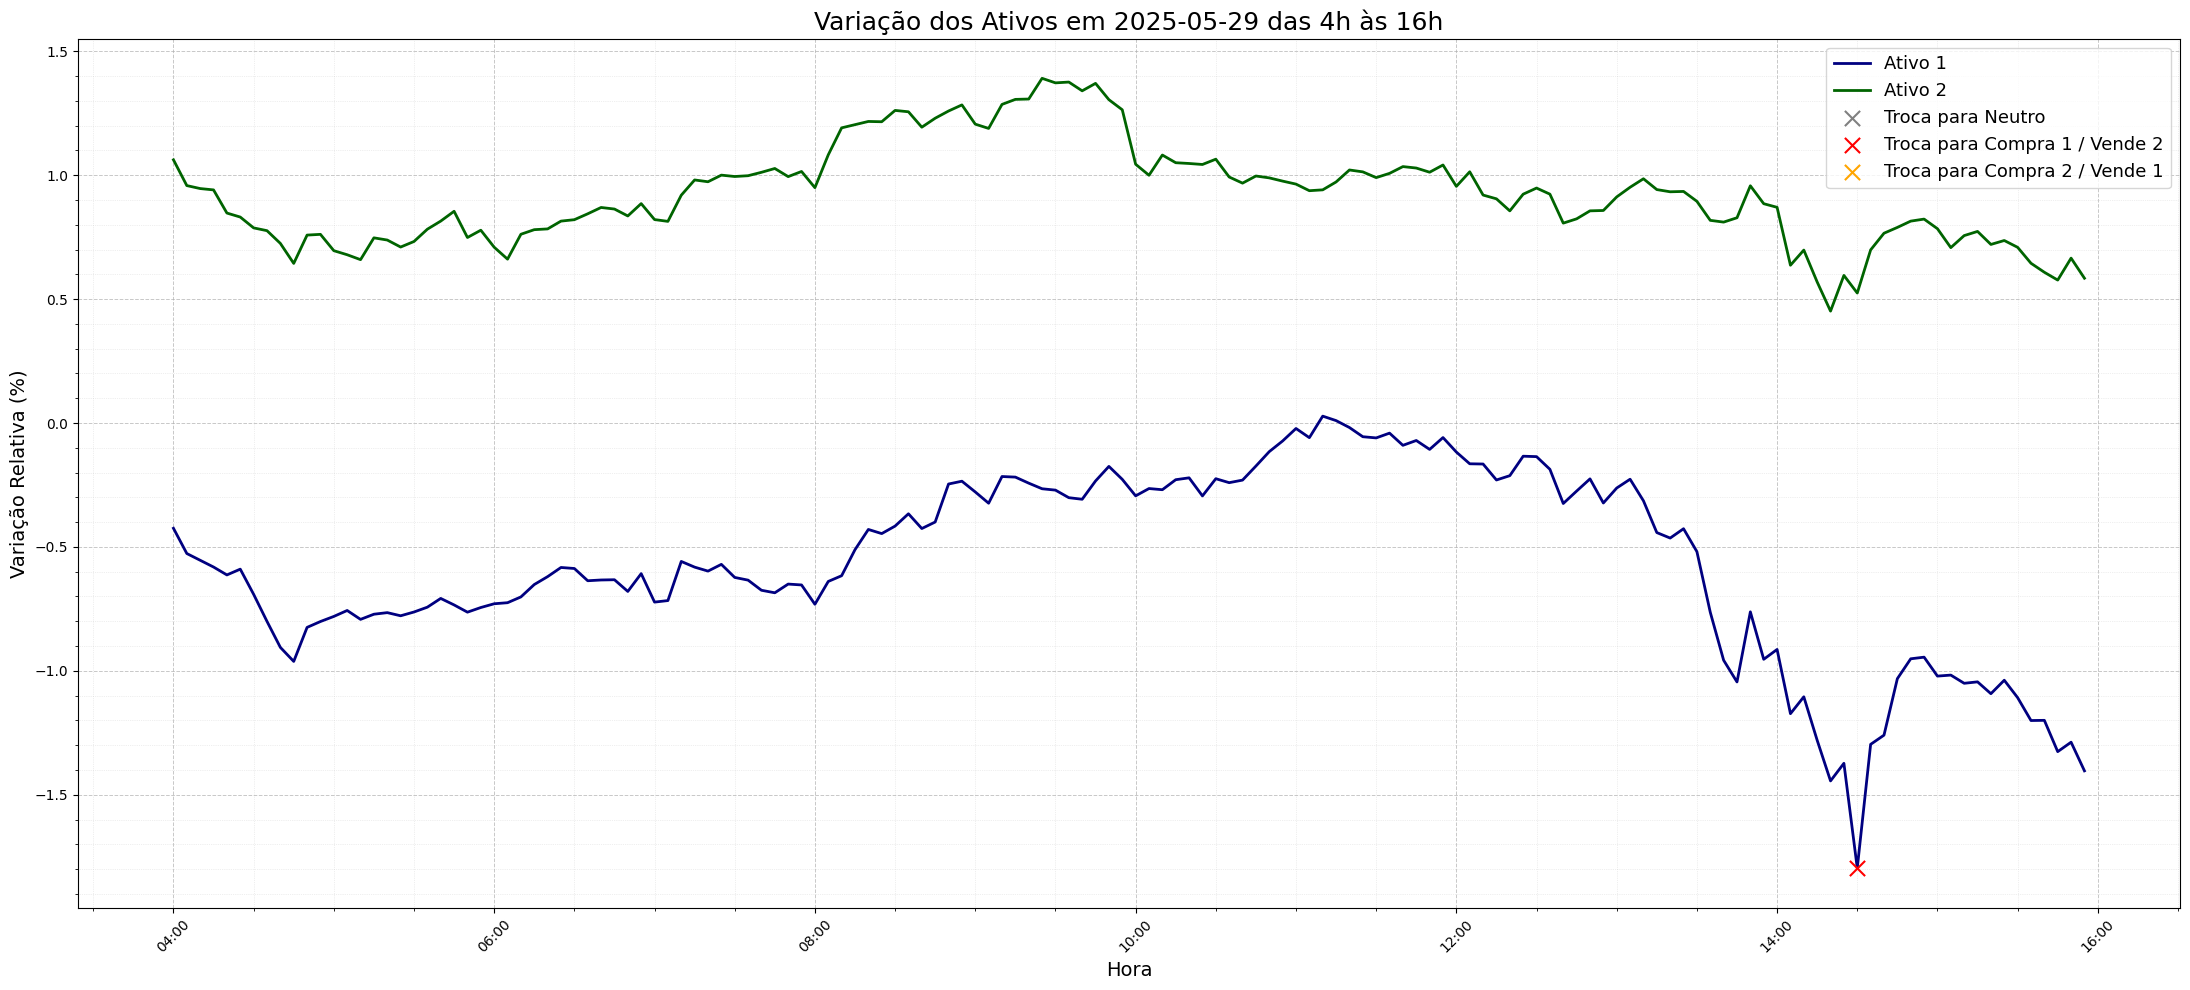

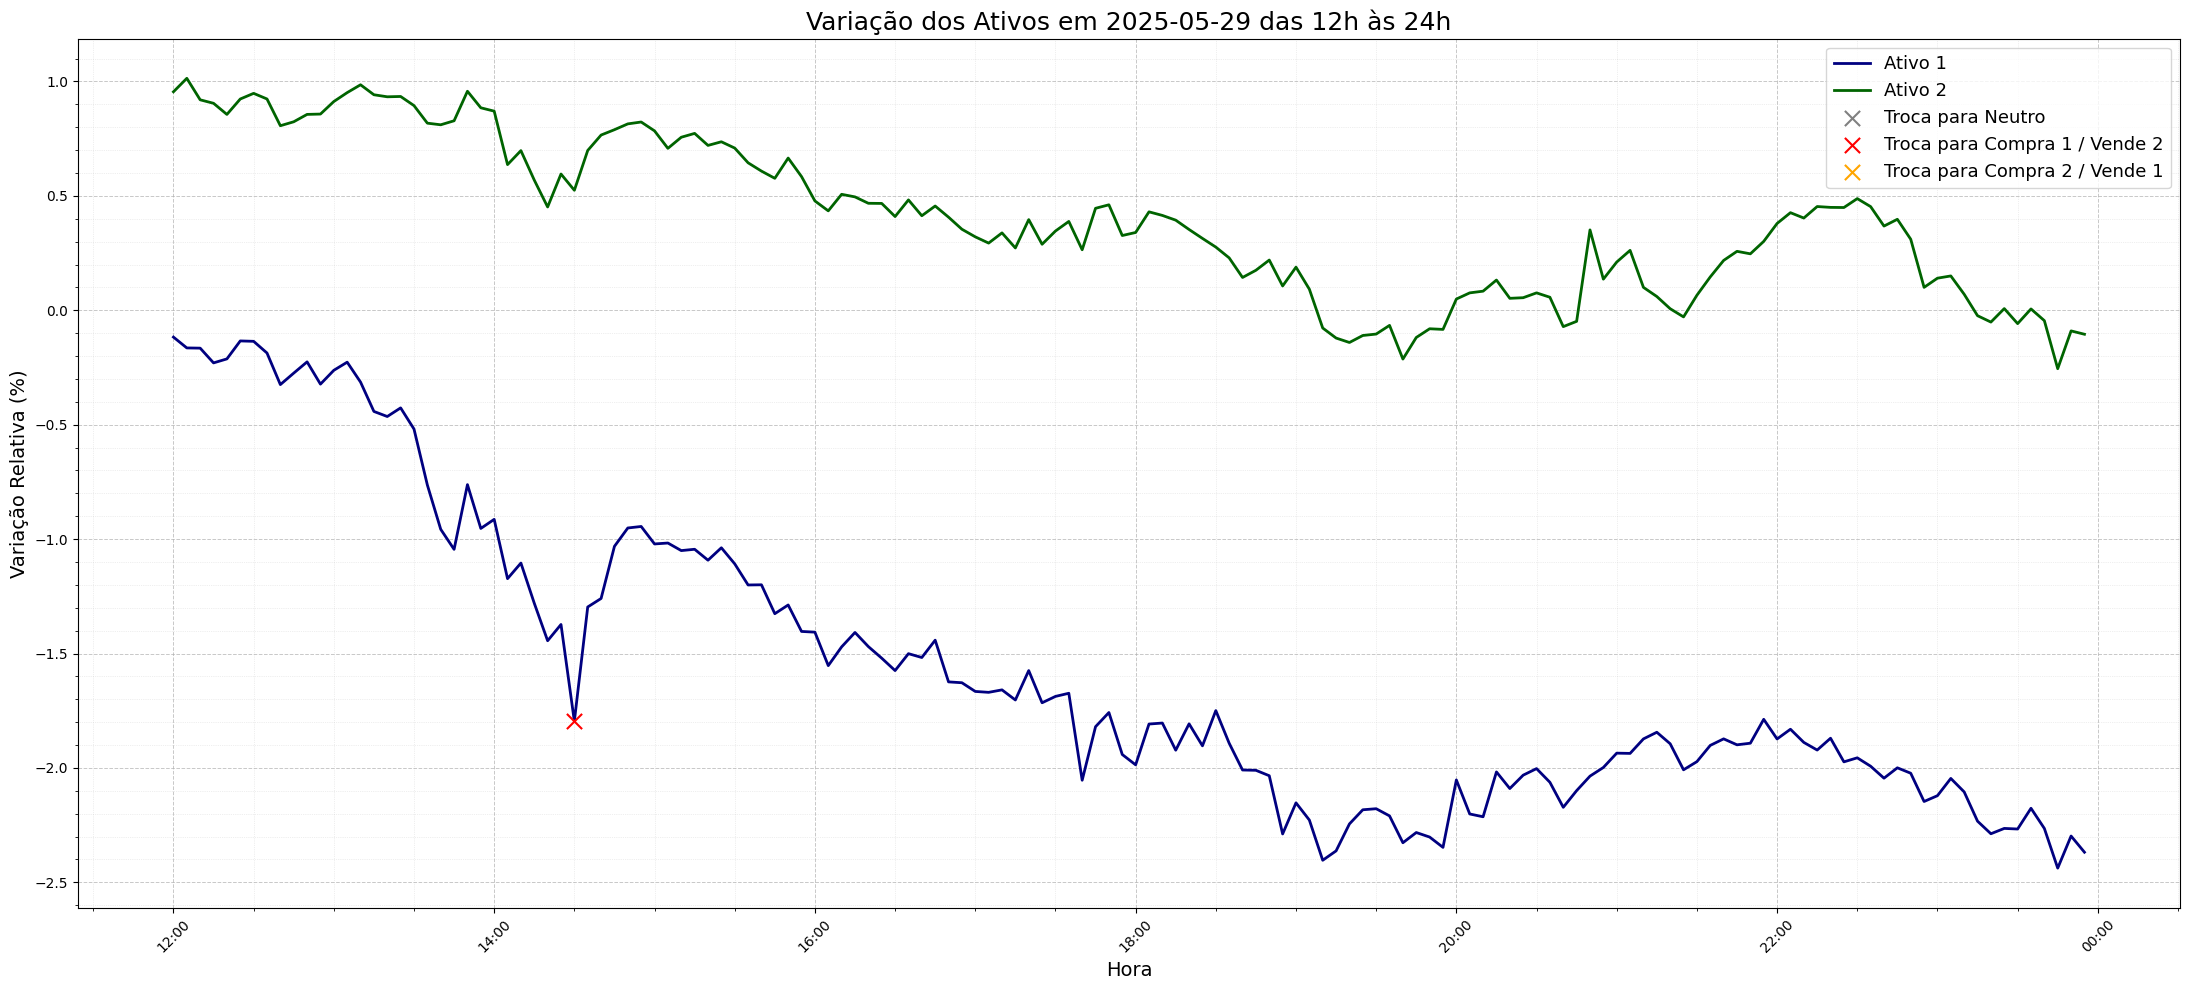

In [52]:
# Lista de dias únicos disponíveis
dias_disponiveis = sorted(df['date'].unique())

# Horários que você quer analisar (ex: 8h, 12h, 16h)
horarios = [4,12]

for dia in dias_disponiveis[:2]:
    for hora in horarios:
        plot_variacao_por_4horas_sinal(df, dia, hora)


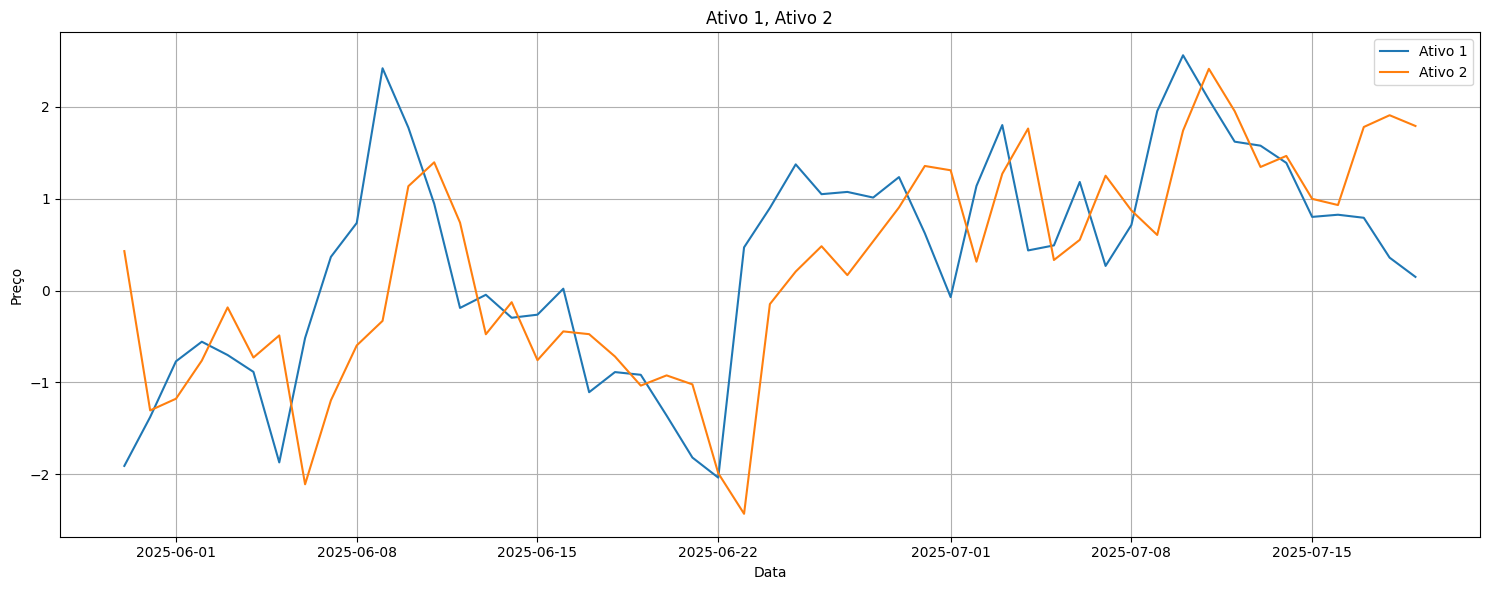

In [45]:
# Converter a coluna timestamp para datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Detectar as mudanças de sinal na coluna 'sinal'
signal_change = df['sinal'] != df['sinal'].shift(1)

# Plotar o gráfico
plt.figure(figsize=(15, 6))

# Linhas principais
plt.plot(df['timestamp'], df['ativo1_std_preco'], label='Ativo 1', linewidth=1.5)
plt.plot(df['timestamp'], df['ativo2_std_preco'], label='Ativo 2', linewidth=1.5)

# Títulos e legendas
plt.title('Ativo 1, Ativo 2')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

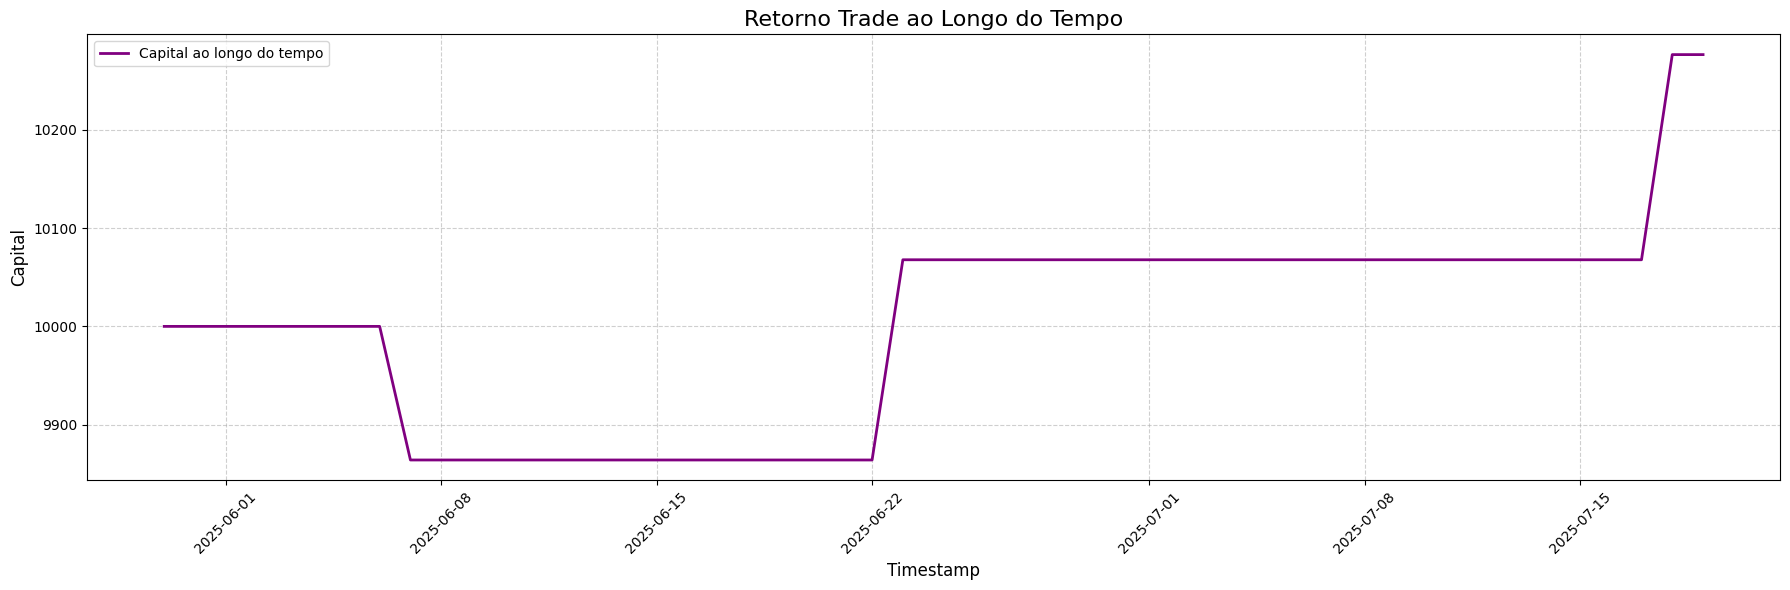

In [40]:
# Leitura do CSV
df = pd.read_excel("resultados/retornos.xlsx")

# Gráfico de retorno
df['capital'] = pd.to_numeric(df['capital'], errors='coerce')
plt.figure(figsize=(18, 6))
plt.plot(df['timestamp'], df['capital'], label='Capital ao longo do tempo', color='purple', linewidth=2)
plt.title('Retorno Trade ao Longo do Tempo', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Capital', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()